In [35]:
!pip install nltk


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [36]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer


In [37]:
df = pd.read_csv('data.csv')


In [38]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
df['Tweet'] = df['Tweet'].apply(lambda x: x.lower())#lowercase

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'(@[\w]+\s)+','username ',x))#username

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'http\S+|www\S+','http',x))#link

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'#(([\w]+\s[\w]+)+)',r'\1',x))#hashtags

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'(#[\w]+)+',' ',x))#hashtags

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub('[^\w\s]','',x))#punctuation and all emojis

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub('amp','and',x))

df['Tweet'] = df['Tweet'].apply(lambda x: re.sub('\s+',' ',x))#remove whitespaces

df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))#lemmatization


In [40]:
df['category'] = df['Label'].apply(lambda x: 1 if x =='Joyous' else 2 if x =='Sarcasm' else 0)

In [41]:
df.head()

,Label,Tweet,category
0,Schadenfreude,username did the police officer in question th...,0
1,Schadenfreude,username please report to the carwash your bit...,0
2,Sarcasm,username right wing christianity is a mean and...,2
3,Schadenfreude,username it part of history so no it wont what...,0
4,Sarcasm,username i guess the forecast wa wrong but at ...,2


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [43]:
X, y = df['Tweet'], df['category']
metrics = []

skf = KFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = TfidfVectorizer(ngram_range=(1,3), max_features=1000)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    svm = SVC()
    svm.fit(X_train_dtm, y_train)
    y_pred_class = svm.predict(X_test_dtm)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print(classification_report(y_test, y_pred_class))

Mean accuracy:  0.7251197848076438
Std for accuracy:  0.01587889586679441
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       305
           1       0.63      0.94      0.76       280
           2       0.76      0.38      0.50       216

    accuracy                           0.73       801
   macro avg       0.75      0.70      0.69       801
weighted avg       0.76      0.73      0.71       801



In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

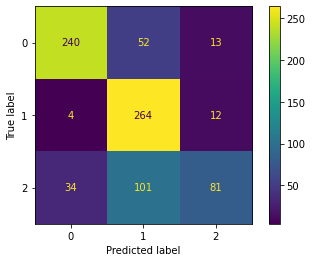

In [45]:
cm = confusion_matrix(y_test, y_pred_class, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [46]:
X, y = df['Tweet'], df['category']
metrics = []

skf = KFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    svm = SVC()
    svm.fit(X_train_dtm, y_train)
    y_pred_class = svm.predict(X_test_dtm)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print(classification_report(y_test, y_pred_class))

Mean accuracy:  0.7243707211372319
Std for accuracy:  0.013347659500674272
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       305
           1       0.63      0.94      0.75       280
           2       0.76      0.37      0.49       216

    accuracy                           0.73       801
   macro avg       0.75      0.70      0.69       801
weighted avg       0.75      0.73      0.71       801



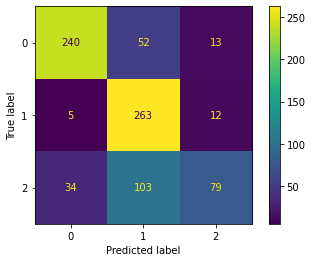

In [47]:
cm = confusion_matrix(y_test, y_pred_class, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [48]:
X, y = df['Tweet'], df['category']
metrics = []

skf = KFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = TfidfVectorizer(ngram_range=(2,3), max_features=1000)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    svm = SVC()
    svm.fit(X_train_dtm, y_train)
    y_pred_class = svm.predict(X_test_dtm)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print(classification_report(y_test, y_pred_class))

Mean accuracy:  0.5752039999875468
Std for accuracy:  0.015653365194301907
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       305
           1       0.49      0.74      0.59       280
           2       0.62      0.31      0.41       216

    accuracy                           0.57       801
   macro avg       0.59      0.55      0.54       801
weighted avg       0.59      0.57      0.56       801



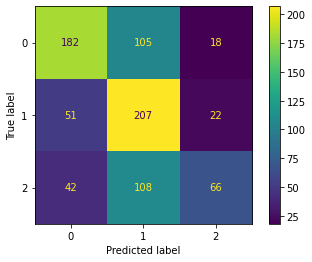

In [49]:
cm = confusion_matrix(y_test, y_pred_class, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [50]:
X, y = df['Tweet'], df['category']
metrics = []

skf = KFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = TfidfVectorizer(ngram_range=(1,1), max_features=1000)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    svm = SVC()
    svm.fit(X_train_dtm, y_train)
    y_pred_class = svm.predict(X_test_dtm)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print(classification_report(y_test, y_pred_class))

Mean accuracy:  0.7213775797709223
Std for accuracy:  0.01604497919709016
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       305
           1       0.63      0.94      0.76       280
           2       0.76      0.38      0.50       216

    accuracy                           0.72       801
   macro avg       0.75      0.70      0.69       801
weighted avg       0.75      0.72      0.71       801



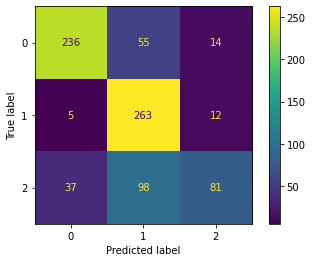

In [51]:
cm = confusion_matrix(y_test, y_pred_class, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [52]:
X, y = df['Tweet'], df['category']
metrics = []

skf = KFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = TfidfVectorizer(ngram_range=(2,2), max_features=1000)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    svm = SVC()
    svm.fit(X_train_dtm, y_train)
    y_pred_class = svm.predict(X_test_dtm)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print(classification_report(y_test, y_pred_class))

Mean accuracy:  0.5834318697637928
Std for accuracy:  0.020020546635930298
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       305
           1       0.48      0.73      0.58       280
           2       0.61      0.28      0.39       216

    accuracy                           0.56       801
   macro avg       0.59      0.54      0.53       801
weighted avg       0.59      0.56      0.55       801



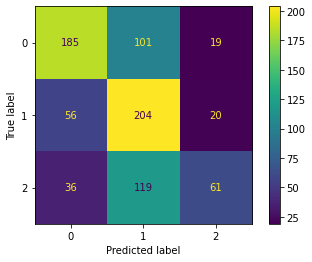

In [53]:
cm = confusion_matrix(y_test, y_pred_class, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()

In [54]:
X, y = df['Tweet'], df['category']
metrics = []

skf = KFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    vect = TfidfVectorizer(ngram_range=(3,3), max_features=1000)
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    svm = SVC()
    svm.fit(X_train_dtm, y_train)
    y_pred_class = svm.predict(X_test_dtm)

    metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)
print('Mean accuracy: ', np.mean(metrics, axis=0))
print('Std for accuracy: ', np.std(metrics, axis=0))
print(classification_report(y_test, y_pred_class))

Mean accuracy:  0.4387595306365796
Std for accuracy:  0.011982400695301083
              precision    recall  f1-score   support

           0       0.74      0.21      0.32       305
           1       0.38      0.95      0.55       280
           2       0.52      0.05      0.09       216

    accuracy                           0.43       801
   macro avg       0.55      0.40      0.32       801
weighted avg       0.56      0.43      0.34       801



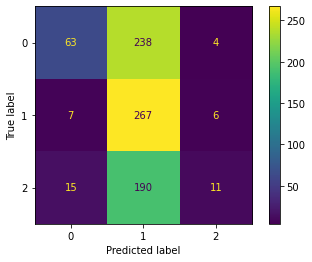

In [55]:
cm = confusion_matrix(y_test, y_pred_class, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()